In [ ]:
!pip install MiniSom

In [ ]:
import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt

In [ ]:
# Generowanie losowego zestawu danych
np.random.seed(42)
data = np.random.rand(100, 7)  # 100 próbek, każda z 7 cechami

In [ ]:
# Parametry sieci SOM
som_width = 10
som_height = 10
input_len = data.shape[1]

# Tworzenie sieci SOM
som = MiniSom(som_height, som_width, input_len, sigma=1.0, learning_rate=0.7)
som.random_weights_init(data)
som.train_random(data, 10000)  # trenowanie przez 100 iteracji

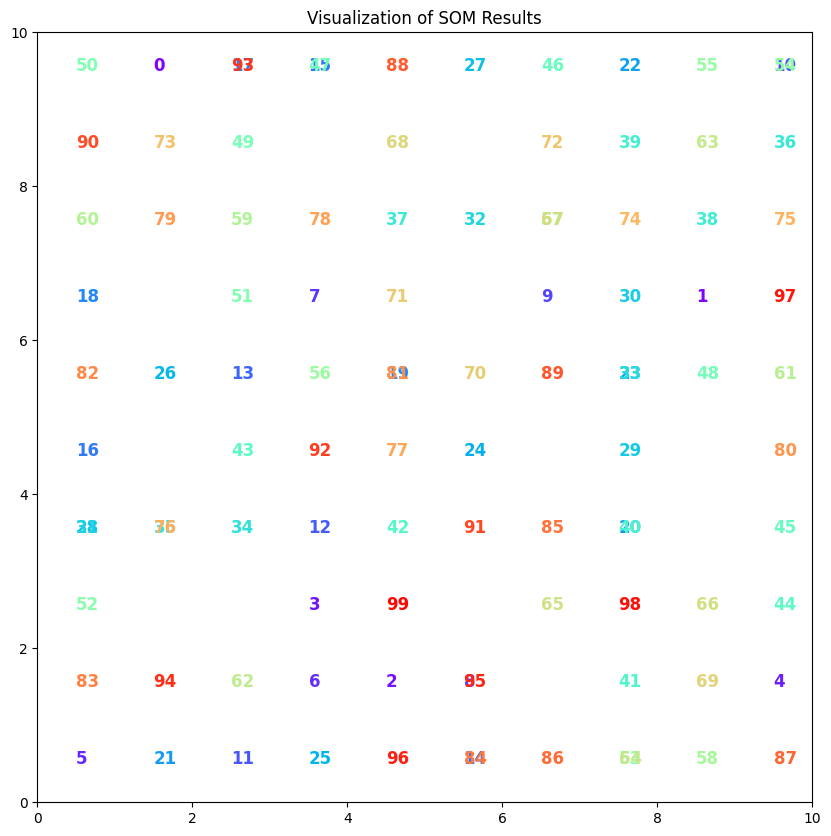

In [ ]:
# Wizualizacja wyników
plt.figure(figsize=(10, 10))  # Tworzy wykres o rozmiarze 10x10 cali
for i, x in enumerate(data):  # Iteruje przez wszystkie próbki danych
    w = som.winner(x)  # Znajduje zwycięski neuron (BMU) dla danej próbki x
    # Umieszcza numer próbki w miejscu zwycięskiego neuronu, kolorując go w zależności od indeksu próbki
    plt.text(w[0] + .5, w[1] + .5, str(i), color=plt.cm.rainbow(i / 100.0), fontdict={'weight': 'bold', 'size': 12})
plt.xlim([0, som_width])  # Ustawia zakres osi x na szerokość SOM
plt.ylim([0, som_height])  # Ustawia zakres osi y na wysokość SOM
plt.title('Visualization of SOM Results')
plt.show()  # Wyświetla wykres

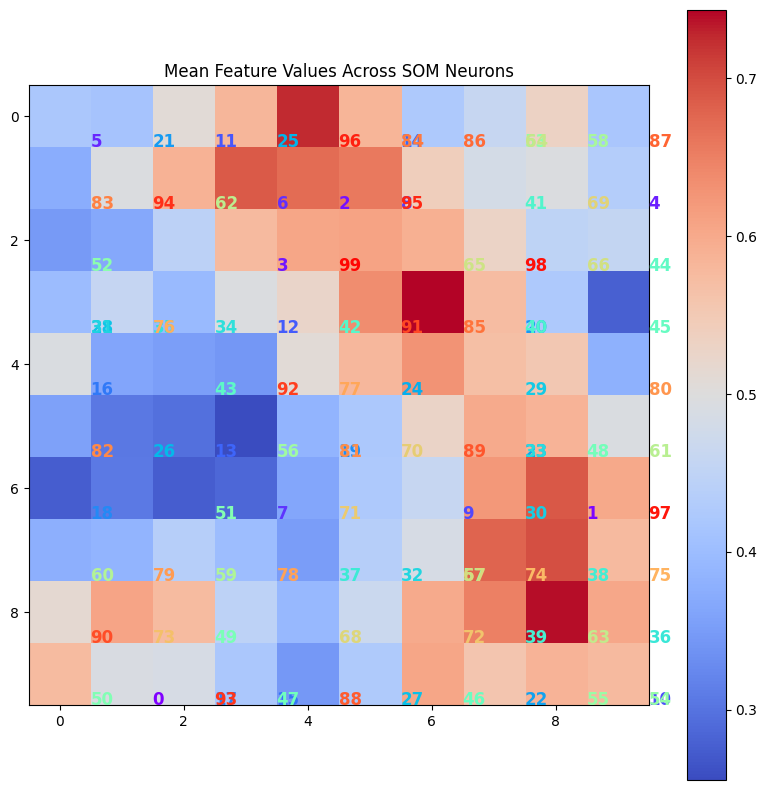

In [ ]:
# Kolorowanie neuronów na podstawie średnich wartości cech danych przypisanych do neuronów
plt.figure(figsize=(10, 10))  # Tworzy nowy wykres o rozmiarze 10x10 cali
for i, x in enumerate(data):  # Iteruje przez wszystkie próbki danych
    w = som.winner(x)  # Znajduje zwycięski neuron (BMU) dla danej próbki x
    # Umieszcza numer próbki w miejscu zwycięskiego neuronu, kolorując go w zależności od indeksu próbki
    plt.text(w[0] + .5, w[1] + .5, str(i), color=plt.cm.rainbow(i / 100.0), fontdict={'weight': 'bold', 'size': 12})

# Tworzenie macierzy średnich wartości cech dla neuronów
weights = som.get_weights()  # Pobiera wagi neuronów po zakończeniu treningu
mean_map = np.zeros((som_height, som_width))  # Inicjalizuje macierz o wymiarach 10x10 do przechowywania średnich wartości cech
for i in range(som_height):  # Iteruje przez wiersze macierzy
    for j in range(som_width):  # Iteruje przez kolumny macierzy
        mean_map[i, j] = np.mean(weights[i, j])  # Oblicza średnie wartości cech dla każdego neuronu i zapisuje je w mean_map

plt.imshow(mean_map, cmap='coolwarm')  # Wyświetla macierz średnich wartości cech jako obraz z kolorowaniem
plt.colorbar()  # Dodaje pasek kolorów do wykresu
plt.title('Mean Feature Values Across SOM Neurons')  # Dodaje tytuł do wykresu
plt.show()  # Wyświetla wykres

In [ ]:
from sklearn.datasets import make_blobs

# Generowanie danych z etykietami
np.random.seed(42)
data, labels = make_blobs(n_samples=100, centers=3, cluster_std=0.60, random_state=0)

# Parametry sieci SOM
som_width = 10
som_height = 10
input_len = data.shape[1]

# Tworzenie sieci SOM
som = MiniSom(som_height, som_width, input_len, sigma=1.0, learning_rate=0.7)
som.random_weights_init(data)
som.train_random(data, 10000)  # trenowanie przez 10000 iteracji

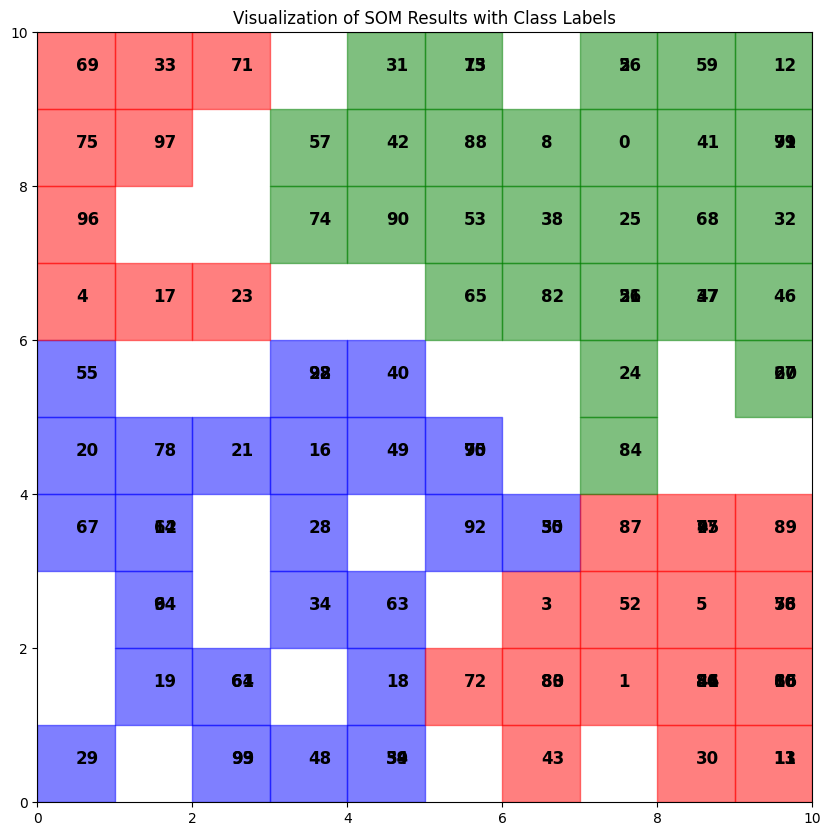

In [ ]:
# Kolorowanie neuronów na podstawie klas przypisanych do neuronów
plt.figure(figsize=(10, 10))
wmap = {}  # Mapa neuronów i przypisanych etykiet klas
for i, x in enumerate(data):
    w = som.winner(x)
    wmap[w] = wmap.get(w, []) + [labels[i]]

# Ustalanie kolorów dla każdej klasy
colors = ['r', 'g', 'b']
for i in range(som_height):
    for j in range(som_width):
        if (i, j) in wmap:
            counts = np.bincount(wmap[(i, j)])
            color = colors[np.argmax(counts)]
            plt.fill_between([j, j+1], i, i+1, color=color, alpha=0.5)

# Umieszczanie numerów próbek na mapie
for i, x in enumerate(data):
    w = som.winner(x)
    plt.text(w[1] + .5, w[0] + .5, str(i), color='black', fontdict={'weight': 'bold', 'size': 12})

plt.xlim([0, som_width])
plt.ylim([0, som_height])
plt.title('Visualization of SOM Results with Class Labels')
plt.show()

In [ ]:
!pip install neupy



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 3.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of neupy to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.7/224.7 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.3/212.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.5/208.5 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.0/208.0 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.2/197.2 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 19.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for tableprint: filename=

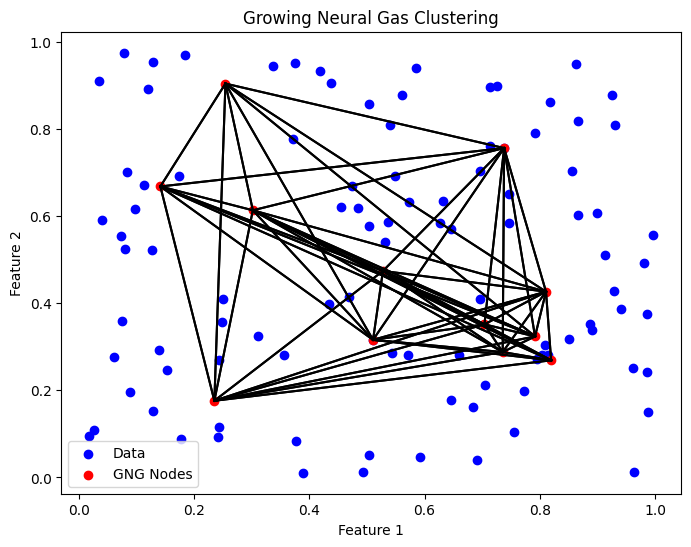

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import neupy
class GrowingNeuralGas:
    def __init__(self, max_nodes=100, max_age=100, learning_rate=0.5, neighbor_learning_rate=0.01):
        self.max_nodes = max_nodes
        self.max_age = max_age
        self.learning_rate = learning_rate
        self.neighbor_learning_rate = neighbor_learning_rate
        self.nodes = []
        self.edges = {}

    def fit(self, data, epochs=1000):
        # Initialize with two random nodes
        self.nodes = [data[np.random.randint(len(data))] for _ in range(2)]
        self.edges = {0: {}, 1: {}}

        for epoch in range(epochs):
            sample = data[np.random.randint(len(data))]
            distances = np.linalg.norm(self.nodes - sample, axis=1)
            winner_idx = np.argmin(distances)
            neighbor_idx = np.argsort(distances)[1]

            # Increment the age of all edges emanating from the winner
            for neighbor in self.edges[winner_idx]:
                self.edges[winner_idx][neighbor] += 1

            # Update the winner and its neighbors
            self.nodes[winner_idx] += self.learning_rate * (sample - self.nodes[winner_idx])
            for neighbor in self.edges[winner_idx]:
                self.nodes[neighbor] += self.neighbor_learning_rate * (sample - self.nodes[neighbor])

            # Add edge between winner and the closest neighbor
            if neighbor_idx not in self.edges[winner_idx]:
                self.edges[winner_idx][neighbor_idx] = 0
                if neighbor_idx not in self.edges:
                    self.edges[neighbor_idx] = {}
                self.edges[neighbor_idx][winner_idx] = 0

            # Remove edges with age greater than max_age
            self.edges[winner_idx] = {k: v for k, v in self.edges[winner_idx].items() if v < self.max_age}
            for neighbor in list(self.edges[winner_idx].keys()):
                if winner_idx not in self.edges[neighbor]:
                    del self.edges[winner_idx][neighbor]

            # Add a new node
            if len(self.nodes) < self.max_nodes and epoch % 100 == 0:
                q = np.argmax([len(neighbors) for neighbors in self.edges.values()])
                f = np.argmax([self.edges[q][n] for n in self.edges[q]])
                new_node = (self.nodes[q] + self.nodes[f]) / 2
                self.nodes.append(new_node)
                new_idx = len(self.nodes) - 1
                self.edges[q][new_idx] = 0
                self.edges[f][new_idx] = 0
                self.edges[new_idx] = {q: 0, f: 0}

# Ustawienie ziarna losowego
np.random.seed(42)

# Generowanie losowych danych (100 próbek, każda z 7 cechami)
data = np.random.rand(100, 7)

# Inicjalizacja i dopasowanie modelu GNG
gng = GrowingNeuralGas(max_nodes=50, max_age=50)
gng.fit(data)

# Wizualizacja wyników (dla uproszczenia tylko pierwsze dwie cechy)
nodes = np.array(gng.nodes)

plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], color='blue', label='Data')
plt.scatter(nodes[:, 0], nodes[:, 1], color='red', label='GNG Nodes')
for node, neighbors in gng.edges.items():
    for neighbor in neighbors:
        plt.plot([nodes[node, 0], nodes[neighbor, 0]], [nodes[node, 1], nodes[neighbor, 1]], color='black')
plt.legend()
plt.title('Growing Neural Gas Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

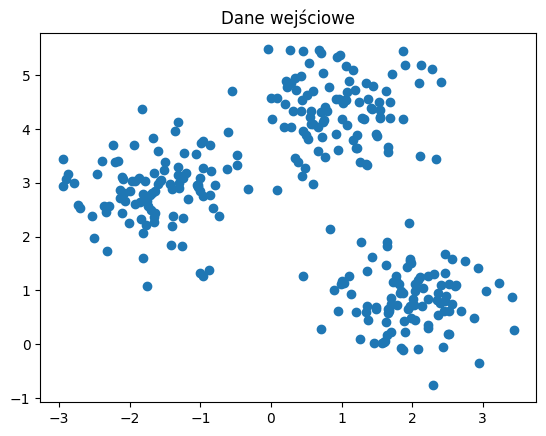

In [ ]:
# Generowanie danych
data, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)
plt.scatter(data[:, 0], data[:, 1])
plt.title("Dane wejściowe")
plt.show()

In [ ]:
class SOM:
    def __init__(self, x, y, input_len, learning_rate=0.5):
        self.x = x
        self.y = y
        self.learning_rate = learning_rate
        self.weights = np.random.rand(x * y, input_len)
        self.locations = np.array(list(self.neuron_locations()))

    def neuron_locations(self):
        for i in range(self.x):
            for j in range(self.y):
                yield np.array([i, j])

    def find_bmu(self, sample):
        distances = np.linalg.norm(self.weights - sample, axis=1)
        bmu_index = np.argmin(distances)
        return bmu_index

    def update_weights(self, sample, bmu_index, iteration, max_iterations):
        learning_rate = self.learning_rate * np.exp(-iteration / max_iterations)
        sigma = max(self.x, self.y) / 2 * np.exp(-iteration / (max_iterations / np.log(max(self.x, self.y) / 2)))
        bmu_location = self.locations[bmu_index]

        for i, location in enumerate(self.locations):
            distance_to_bmu = np.linalg.norm(location - bmu_location)
            if distance_to_bmu < sigma:
                influence = np.exp(-distance_to_bmu / (2 * (sigma ** 2)))
                self.weights[i] += learning_rate * influence * (sample - self.weights[i])

    def train(self, data, max_iterations):
        for iteration in range(max_iterations):
            for sample in data:
                bmu_index = self.find_bmu(sample)
                self.update_weights(sample, bmu_index, iteration, max_iterations)

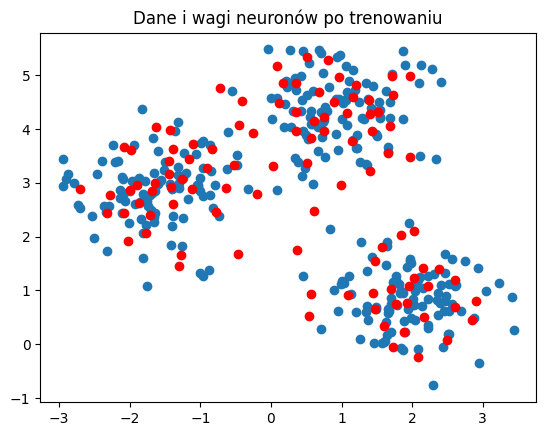

In [ ]:
# Parametry SOM
som = SOM(x=10, y=10, input_len=2, learning_rate=0.7)
max_iterations = 100

# Trenowanie
som.train(data, max_iterations)

# Wizualizacja
plt.scatter(data[:, 0], data[:, 1])
for weight in som.weights:
    plt.scatter(weight[0], weight[1], c='red')
plt.title("Dane i wagi neuronów po trenowaniu")
plt.show()

In [ ]:
!pip install minisom
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.datasets import make_blobs

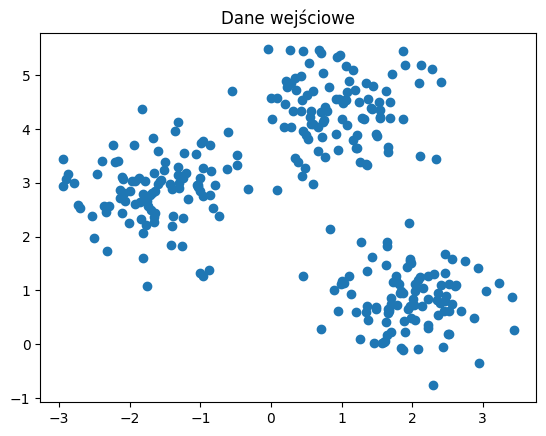

In [ ]:
# Generowanie danych
data, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)
plt.scatter(data[:, 0], data[:, 1])
plt.title("Dane wejściowe")
plt.show()

In [ ]:
# Parametry SOM
som_width = 10
som_height = 10
input_len = data.shape[1]
sigma = 1.0
learning_rate = 0.3

# Inicjalizacja SOM
som = MiniSom(som_width, som_height, input_len, sigma=sigma, learning_rate=learning_rate)

# Inicjalizacja wag neuronów
som.random_weights_init(data)

# Trenowanie SOM
max_iterations = 10000
som.train_random(data, max_iterations)

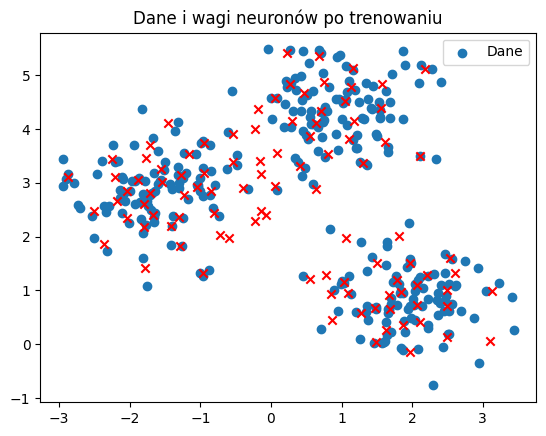

In [ ]:
# Wyciągnięcie wag neuronów po treningu
weights = som.get_weights()

# Wizualizacja wag neuronów
plt.scatter(data[:, 0], data[:, 1], label='Dane')
for i in range(som_width):
    for j in range(som_height):
        plt.scatter(weights[i, j, 0], weights[i, j, 1], c='red', marker='x')
plt.title("Dane i wagi neuronów po trenowaniu")
plt.legend()
plt.show()

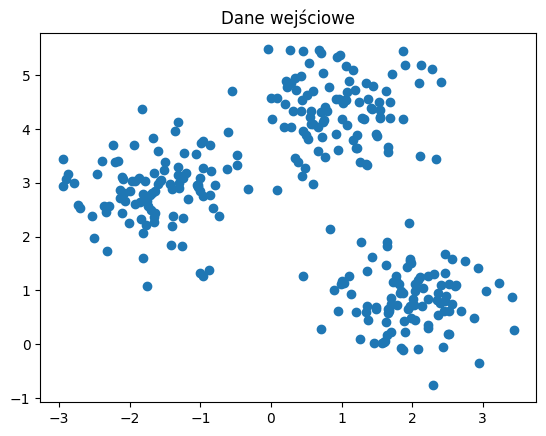

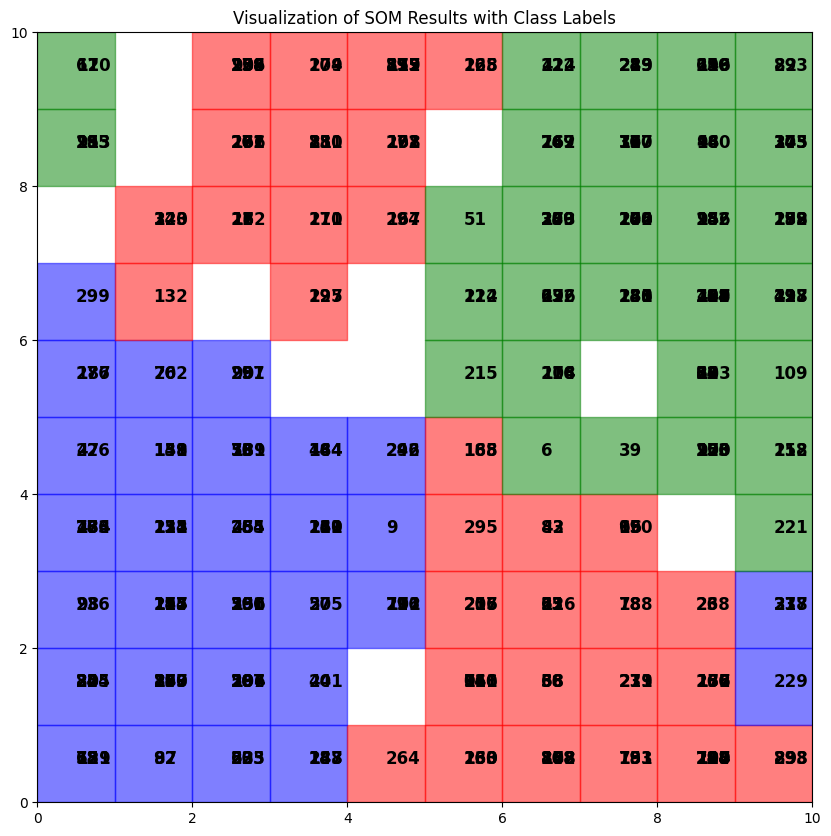

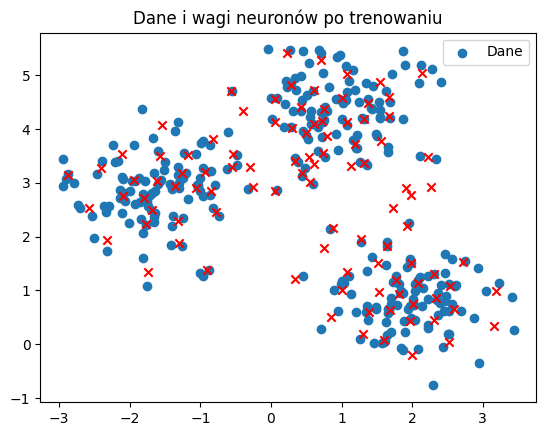

In [ ]:
# Generowanie danych z etykietami
data, labels = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)
plt.scatter(data[:, 0], data[:, 1])
plt.title("Dane wejściowe")
plt.show()

# Parametry SOM
som_width = 10
som_height = 10
input_len = data.shape[1]
sigma = 1.0
learning_rate = 0.3

# Inicjalizacja SOM
som = MiniSom(som_width, som_height, input_len, sigma=sigma, learning_rate=learning_rate)

# Inicjalizacja wag neuronów
som.random_weights_init(data)

# Trenowanie SOM
max_iterations = 10000
som.train_random(data, max_iterations)

# Wyciągnięcie wag neuronów po treningu
weights = som.get_weights()

# Wizualizacja wyników
plt.figure(figsize=(10, 10))
wmap = {}  # Mapa neuronów i przypisanych etykiet klas
for i, x in enumerate(data):
    w = som.winner(x)
    wmap[w] = wmap.get(w, []) + [labels[i]]

# Ustalanie kolorów dla każdej klasy
colors = ['r', 'g', 'b']
for i in range(som_width):
    for j in range(som_height):
        if (i, j) in wmap:
            counts = np.bincount(wmap[(i, j)])
            color = colors[np.argmax(counts)]
            plt.fill_between([j, j+1], i, i+1, color=color, alpha=0.5)

# Umieszczanie numerów próbek na mapie
for i, x in enumerate(data):
    w = som.winner(x)
    plt.text(w[1] + .5, w[0] + .5, str(i), color='black', fontdict={'weight': 'bold', 'size': 12})

plt.xlim([0, som_width])
plt.ylim([0, som_height])
plt.title('Visualization of SOM Results with Class Labels')
plt.show()

# Dodatkowa wizualizacja wag neuronów po trenowaniu
plt.scatter(data[:, 0], data[:, 1], label='Dane')
for i in range(som_width):
    for j in range(som_height):
        plt.scatter(weights[i, j, 0], weights[i, j, 1], c='red', marker='x')
plt.title("Dane i wagi neuronów po trenowaniu")
plt.legend()
plt.show()

In [ ]:
import numpy as np
from numpy.ma.core import ceil
from scipy.spatial import distance #distance calculation
from sklearn.preprocessing import MinMaxScaler #normalisation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #scoring
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import animation, colors

In [ ]:
import requests
url ='https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt'
# Download the file
response = requests.get(url)
data = response.text

# Save the data to a file
data_file = 'data_banknote_authentication.txt'
with open(data_file, 'w') as f:
    f.write(data)

# Load the data into numpy arrays
data_x = np.loadtxt(data_file, delimiter=",", skiprows=0, usecols=range(0, 4), dtype=np.float64)
data_y = np.loadtxt(data_file, delimiter=",", skiprows=0, usecols=(4,), dtype=np.int64)


In [ ]:
print("data_x:\n", data_x[:5])
print("data_y:\n", data_y[:5])

data_x:
 [[ 3.6216   8.6661  -2.8073  -0.44699]
 [ 4.5459   8.1674  -2.4586  -1.4621 ]
 [ 3.866   -2.6383   1.9242   0.10645]
 [ 3.4566   9.5228  -4.0112  -3.5944 ]
 [ 0.32924 -4.4552   4.5718  -0.9888 ]]
data_y:
 [0 0 0 0 0]


In [ ]:
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2, random_state=42)
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape) # check the shapes

(1097, 4) (1097,) (275, 4) (275,)


In [ ]:
#a funkcja normalizuje dane, przekształcając je na zakres od 0 do 1 przy użyciu MinMaxScaler z biblioteki sklearn.preprocessing.
# scaler.fit_transform(data) dopasowuje skalę do danych i przekształca je.
# scaled to znormalizowane dane, które są zwracane przez funkcję.
def minmax_scaler(data):
  scaler = MinMaxScaler()
  scaled = scaler.fit_transform(data)
  return scaled

# Euclidean distance
# Ta funkcja oblicza odległość euklidesową między dwoma wektorami x i y przy użyciu funkcji euclidean z biblioteki scipy.spatial.distance.
def e_distance(x,y):
  return distance.euclidean(x,y)

# Manhattan distance
# Ta funkcja oblicza odległość Manhattan (lub odległość cityblock) między dwoma wektorami x i y przy użyciu funkcji cityblock z biblioteki scipy.spatial.distance.
def m_distance(x,y):
  return distance.cityblock(x,y)

# Best Matching Unit search
# Ta funkcja znajduje neuron SOM, który jest najbliżej danego wektora wejściowego data[t].
# shortest_distance jest początkowo ustawiona na maksymalną możliwą odległość w przestrzeni cech.
# Pętla for row in range(num_rows) i for col in range(num_cols) iteruje przez wszystkie neurony w SOM.
# distance = e_distance(som[row][col], data[t]) oblicza odległość euklidesową między wektorem wejściowym a wagami danego neuronu.
# Jeśli obliczona odległość jest krótsza niż obecna shortest_distance, aktualizuje shortest_distance i zapisuje pozycję tego neuronu jako winner.
# Funkcja zwraca współrzędne neuronu (BMU), który jest najbliżej wektora wejściowego.
def winning_neuron(data, t, som, num_rows, num_cols):
  winner = [0,0]
  shortest_distance = np.sqrt(data.shape[1]) # initialise with max distance
  input_data = data[t]
  for row in range(num_rows):
    for col in range(num_cols):
      distance = e_distance(som[row][col], data[t])
      if distance < shortest_distance:
        shortest_distance = distance
        winner = [row,col]
  return winner

# Learning rate and neighbourhood range calculation
# Ta funkcja oblicza współczynnik uczenia i zakres sąsiedztwa, które maleją z czasem.
# coefficient maleje liniowo od 1 do 0 w trakcie trwania treningu.
# learning_rate jest początkowym współczynnikiem uczenia zmniejszonym o coefficient.
# neighbourhood_range jest początkowym maksymalnym zasięgiem sąsiedztwa zmniejszonym o coefficient, zaokrąglonym w górę do najbliższej liczby całkowitej przy użyciu funkcji ceil.
# Funkcja zwraca aktualny współczynnik uczenia i zakres sąsiedztwa.
def decay(step, max_steps,max_learning_rate,max_m_dsitance):
  coefficient = 1.0 - (np.float64(step)/max_steps)
  learning_rate = coefficient*max_learning_rate
  neighbourhood_range = ceil(coefficient * max_m_dsitance)
  return learning_rate, neighbourhood_range

In [ ]:
num_rows = 10
num_cols = 10
max_m_dsitance = 4
max_learning_rate = 0.5
max_steps = int(7.5*10e3)


In [ ]:
# Normalizacja danych
train_x_norm = minmax_scaler(train_x)  # Normalizacja danych wejściowych

# Inicjalizacja Samoorganizującej się Mapy (SOM)
num_dims = train_x_norm.shape[1]  # Liczba wymiarów danych wejściowych
np.random.seed(40)  # Ustawienie ziarna generatora liczb losowych dla powtarzalności wyników
som = np.random.random_sample(size=(num_rows, num_cols, num_dims))  # Konstrukcja siatki SOM

# Rozpoczęcie iteracji treningowych
for step in range(max_steps):
    if (step+1) % 1000 == 0:
        print("Iteration: ", step+1)  # Wydrukowanie aktualnej iteracji co 1000 kroków
    learning_rate, neighbourhood_range = decay(step, max_steps, max_learning_rate, max_m_dsitance)

    t = np.random.randint(0, high=train_x_norm.shape[0])  # Losowy indeks danych treningowych
    winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)  # Znalezienie zwycięskiego neuronu

    # Aktualizacja wag neuronów w zasięgu sąsiedztwa
    for row in range(num_rows):
        for col in range(num_cols):
            if m_distance([row, col], winner) <= neighbourhood_range:
                som[row][col] += learning_rate * (train_x_norm[t] - som[row][col])  # Aktualizacja wagi sąsiadujących neuronów

print("SOM training completed")  # Zakończenie treningu SOM

Iteration:  1000
Iteration:  2000
Iteration:  3000
Iteration:  4000
Iteration:  5000
Iteration:  6000
Iteration:  7000
Iteration:  8000
Iteration:  9000
Iteration:  10000
Iteration:  11000
Iteration:  12000
Iteration:  13000
Iteration:  14000
Iteration:  15000
Iteration:  16000
Iteration:  17000
Iteration:  18000
Iteration:  19000
Iteration:  20000
Iteration:  21000
Iteration:  22000
Iteration:  23000
Iteration:  24000
Iteration:  25000
Iteration:  26000
Iteration:  27000
Iteration:  28000
Iteration:  29000
Iteration:  30000
Iteration:  31000
Iteration:  32000
Iteration:  33000
Iteration:  34000
Iteration:  35000
Iteration:  36000
Iteration:  37000
Iteration:  38000
Iteration:  39000
Iteration:  40000
Iteration:  41000
Iteration:  42000
Iteration:  43000
Iteration:  44000
Iteration:  45000
Iteration:  46000
Iteration:  47000
Iteration:  48000
Iteration:  49000
Iteration:  50000
Iteration:  51000
Iteration:  52000
Iteration:  53000
Iteration:  54000
Iteration:  55000
Iteration:  56000
I

In [ ]:
# collecting labels

label_data = train_y
map = np.empty(shape=(num_rows, num_cols), dtype=object)

for row in range(num_rows):
  for col in range(num_cols):
    map[row][col] = [] # empty list to store the label

for t in range(train_x_norm.shape[0]):
  if (t+1) % 1000 == 0:
    print("sample data: ", t+1)
  winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
  map[winner[0]][winner[1]].append(label_data[t]) # label of winning neuron

sample data:  1000


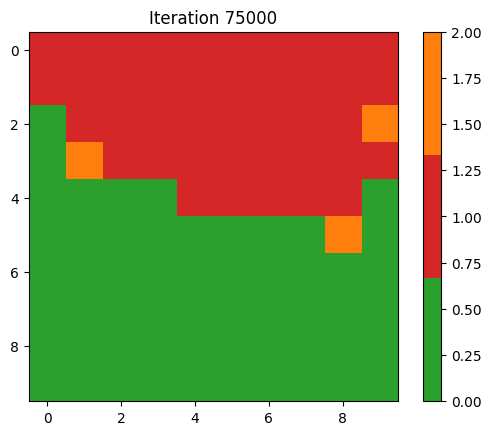

In [ ]:
# construct label map
label_map = np.zeros(shape=(num_rows, num_cols),dtype=np.int64)
for row in range(num_rows):
  for col in range(num_cols):
    label_list = map[row][col]
    if len(label_list)==0:
      label = 2
    else:
      label = max(label_list, key=label_list.count)
    label_map[row][col] = label

title = ('Iteration ' + str(max_steps))
cmap = colors.ListedColormap(['tab:green', 'tab:red', 'tab:orange'])
plt.imshow(label_map, cmap=cmap)
plt.colorbar()
plt.title(title)
plt.show()

In [ ]:

data = minmax_scaler(test_x)

winner_labels = []

for t in range(data.shape[0]):
 winner = winning_neuron(data, t, som, num_rows, num_cols)
 row = winner[0]
 col = winner[1]
 predicted = label_map[row][col]
 winner_labels.append(predicted)

print("Accuracy: ",accuracy_score(test_y, np.array(winner_labels)))

Accuracy:  1.0


In [ ]:
url ='https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt'
# Download the file
response = requests.get(url)
data = response.text

# Save the data to a file
data_file = 'data_banknote_authentication.txt'
with open(data_file, 'w') as f:
    f.write(data)

# Load the data into numpy arrays
data_x = np.loadtxt(data_file, delimiter=",", skiprows=0, usecols=range(0, 4), dtype=np.float64)
data_y = np.loadtxt(data_file, delimiter=",", skiprows=0, usecols=(4,), dtype=np.int64)
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

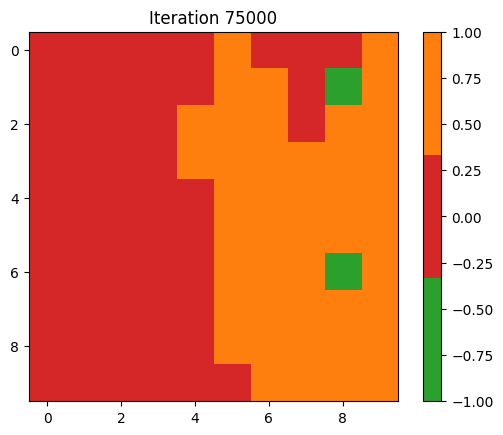

Accuracy:  0.9854545454545455


In [ ]:
# Funkcja normalizująca dane
def minmax_scaler(data):
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(data)
    return scaled

# Normalizacja danych treningowych i testowych
train_x_norm = minmax_scaler(train_x)
test_x_norm = minmax_scaler(test_x)

# Parametry SOM
som_width = 10
som_height = 10
input_len = train_x_norm.shape[1]

# Inicjalizacja SOM
som = MiniSom(som_height, som_width, input_len, sigma=2.0, learning_rate=0.5)
som.random_weights_init(train_x_norm)

# Trenowanie SOM
max_iterations = 75000
som.train_random(train_x_norm, max_iterations)

# Inicjalizacja mapy etykiet
label_map = np.full((som_height, som_width), -1, dtype=int)

# Mapowanie etykiet do neuronów
temp_label_map = np.empty((som_height, som_width), dtype=object)
for i in range(som_height):
    for j in range(som_width):
        temp_label_map[i, j] = []

for x, y in zip(train_x_norm, train_y):
    winner = som.winner(x)
    temp_label_map[winner[0]][winner[1]].append(y)

# Przypisanie najczęściej występującej etykiety do neuronów
for i in range(som_height):
    for j in range(som_width):
        if len(temp_label_map[i, j]) > 0:
            label_map[i, j] = np.bincount(temp_label_map[i, j]).argmax()

# Wizualizacja mapy etykiet
title = ('Iteration ' + str(max_iterations))
cmap = colors.ListedColormap(['tab:green', 'tab:red', 'tab:orange'])
plt.imshow(label_map, cmap=cmap, interpolation='nearest')
plt.colorbar()
plt.title(title)
plt.show()

# Normalizacja danych testowych
data = minmax_scaler(test_x)

# Predykcja etykiet dla danych testowych
winner_labels = []

for x in data:
    winner = som.winner(x)
    predicted = label_map[winner[0]][winner[1]]
    winner_labels.append(predicted)

# Obliczanie dokładności
accuracy = accuracy_score(test_y, winner_labels)
print("Accuracy: ", accuracy)